# **PysLearn**


## **Descripcion del proyecto**
---  

**Proyecto de Analisis de Datos Psicologicos y academicos**  


Este proyecto tiene como objetivo examinar el impacto de factores psicológicos, como la depresión y la ansiedad, sobre el rendimiento estudiantil. Mediante el análisis de datos, se buscará identificar cómo los rasgos de personalidad y los síntomas de padecimientos emocionales influyen en el desempeño académico. Este estudio pretende aportar información valiosa que ayude a entender mejor las interacciones entre el bienestar emocional y los logros académicos, con el fin de ofrecer herramientas para apoyar el desarrollo integral de los estudiantes.

### Descripcion de los conjuntos de datos _(DataSets)_


#### Conjunto de datos sobre el rendimiento de los estudiantes _(Student Performance Dataset)_  

---
**Descripcion**  
Este conjunto de datos consta de 33 características. Este conjunto de datos se puede utilizar para tareas de regresión y análisis.

**Enlace DataSet**  
[DataSet Kaggle](https://www.kaggle.com/datasets/devansodariya/student-performance-data)

#### Encuesta sobre la salud mental de los estudiantes _(Student Mental Health Survey)_  
---
**Descripcion**  
Acerca del conjunto de datos
Encuesta sobre la salud mental de los estudiantes
Los aspectos clave cubiertos en el conjunto de datos incluyen:

Detalles demográficos como género, edad y universidad.
Detalles académicos como nivel de grado, especialidad, año académico y GPA actual.
Estado residencial del estudiante y experiencias de discriminación, acoso o intimidación en el campus.
Los factores del estilo de vida de los estudiantes incluyen la frecuencia de participación en deportes y el promedio de horas de sueño por noche.
Satisfacción de los estudiantes con su campo de estudio y su percepción de la carga académica.
Abordar la presión académica, las preocupaciones financieras y la calidad de las relaciones sociales en el campus.
Frecuencia de experimentar depresión, ansiedad, sentimientos de aislamiento e inseguridad sobre el futuro.
Actividades que realizan los estudiantes para aliviar el estrés.
Este conjunto de datos es valioso para investigadores y formuladores de políticas interesados ​​en el bienestar de los estudiantes, la salud mental y el éxito académico.   

**Enlace DataSet**  
[DataSet Kaggle](https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey/data)


## **Implementacion - Primera parte**
---  
En la primera parte de la implementacion trabajamos con los conjuntos de datos extraidos de la fuente y generamos el conjunto de datos final para el proyecto

### Configuracion de ambiente

In [1]:
# Configuracion de Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/Electiva-datos/datasets/proyecto
!ls

/content/gdrive/My Drive/Colab Notebooks/Electiva-datos/datasets/proyecto
MentalHealthSurvey.csv	student_data.csv  StudentPerformanceFactors.csv


### Importacion de los Conjuntos de datos

In [ ]:
# Student Perfomance Data dataset
#!/bin/bash
!kaggle datasets download devansodariya/student-performance-data
!unzip student-performance-data

Dataset URL: https://www.kaggle.com/datasets/devansodariya/student-performance-data
License(s): CC0-1.0
  0% 0.00/7.16k [00:00<?, ?B/s]
100% 7.16k/7.16k [00:00<00:00, 762kB/s]
Archive:  student-performance-data.zip
  inflating: student_data.csv        


In [ ]:
# Student Mental Health Survey
#!/bin/bash
!kaggle datasets download abdullahashfaqvirk/student-mental-health-survey
!unzip student-mental-health-survey

Dataset URL: https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey
License(s): CC0-1.0
  0% 0.00/1.98k [00:00<?, ?B/s]
100% 1.98k/1.98k [00:00<00:00, 166kB/s]
Archive:  student-mental-health-survey.zip
  inflating: MentalHealthSurvey.csv  


In [ ]:
!ls

MentalHealthSurvey.csv	student-mental-health-survey.zip  StudentPerformanceFactors.csv
student_data.csv	student-performance-data.zip	  student-performance-factors.zip


### Lectura de conjunto de datos

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls

MentalHealthSurvey.csv	student-mental-health-survey.zip  StudentPerformanceFactors.csv
student_data.csv	student-performance-data.zip	  student-performance-factors.zip


In [5]:
df_1 = pd.read_csv('student_data.csv')
df_2 = pd.read_csv('MentalHealthSurvey.csv')

In [ ]:
df_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_2.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


### Analisis Estadistico conjunto de datos

#### Inspeccion General Dataset # 1

In [ ]:
# primeras filas del dataset
print("Primeras filas del dataset:")
display(df_1.head())

# Información general del dataset
print("\nInformación general del dataset:")
df_1.info()

# Dimensiones del dataset
print("\nDimensiones del dataset:")
print(f"Filas: {df_1.shape[0]}, Columnas: {df_1.shape[1]}")


Primeras filas del dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 

In [ ]:
# Estadísticas descriptivas de las variables numericas
display(df_1.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


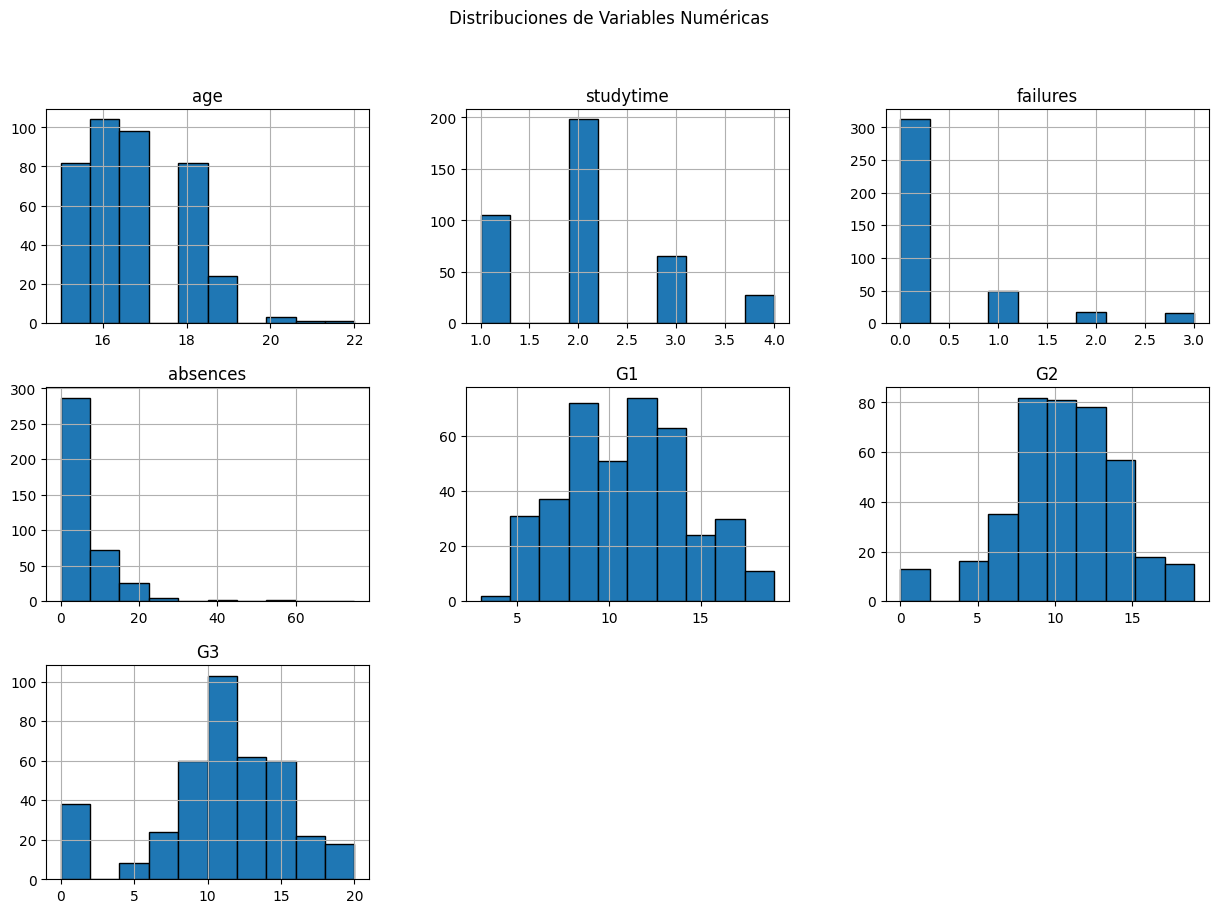

In [ ]:
# Histograma de las principales variables numericas
df_1[['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']].hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()

In [ ]:
# analisis de frecuencias de variables categoricas
categorical_cols = df_1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nFrecuencia de categorías en '{col}':")
    print(df_1[col].value_counts())



Frecuencia de categorías en 'school':
school
GP    349
MS     46
Name: count, dtype: int64

Frecuencia de categorías en 'sex':
sex
F    208
M    187
Name: count, dtype: int64

Frecuencia de categorías en 'address':
address
U    307
R     88
Name: count, dtype: int64

Frecuencia de categorías en 'famsize':
famsize
GT3    281
LE3    114
Name: count, dtype: int64

Frecuencia de categorías en 'Pstatus':
Pstatus
T    354
A     41
Name: count, dtype: int64

Frecuencia de categorías en 'Mjob':
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

Frecuencia de categorías en 'Fjob':
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

Frecuencia de categorías en 'reason':
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

Frecuencia de categorías en 'guardian':
guardian
mother    273
father     90
other      32
Name: count,

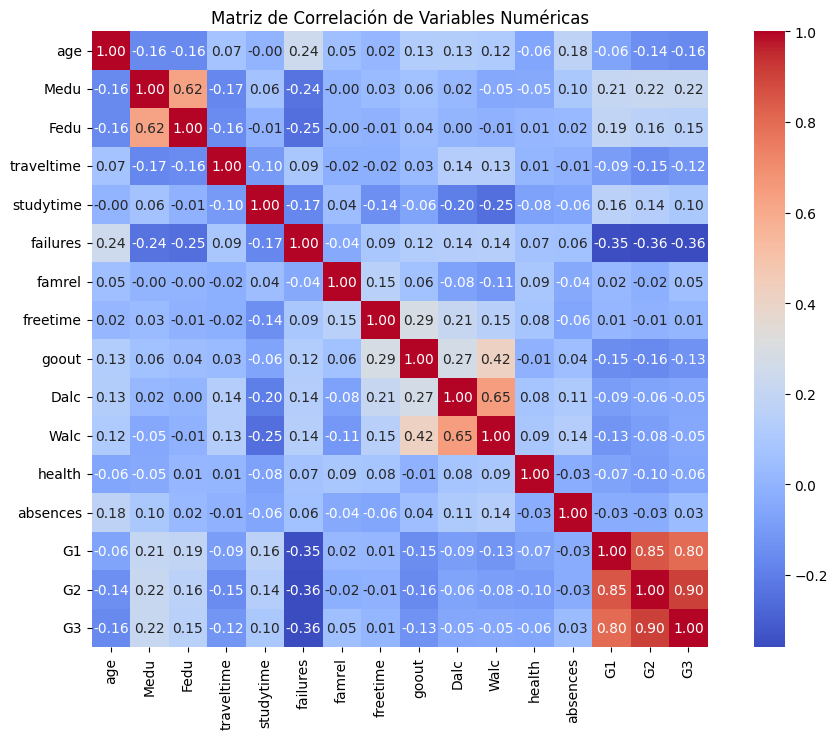

In [ ]:
# Matriz de correlacion y mapa de calor
numerical_df = df_1.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

In [ ]:
# Rendimiento promedio (G3) por categorias seleccionadas
print("Promedio de G3 por Sexo:")
print(df_1.groupby('sex')['G3'].mean())
print("\nPromedio de G3 por Acceso a Internet:")
print(df_1.groupby('internet')['G3'].mean())
print("\nPromedio de G3 por Apoyo Familiar:")
print(df_1.groupby('famsup')['G3'].mean())


Promedio de G3 por Sexo:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

Promedio de G3 por Acceso a Internet:
internet
no      9.409091
yes    10.617021
Name: G3, dtype: float64

Promedio de G3 por Apoyo Familiar:
famsup
no     10.640523
yes    10.272727
Name: G3, dtype: float64


#### Inspeccion General Dataset # 2

In [ ]:
# primeras filas del dataset
print("Primeras filas del dataset:")
display(df_2.head())

# Información general del dataset
print("\nInformación general del dataset:")
df_2.info()

# Dimensiones del dataset
print("\nDimensiones del dataset:")
print(f"Filas: {df_2.shape[0]}, Columnas: {df_2.shape[1]}")

Primeras filas del dataset:


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 

In [ ]:
# Estadísticas descriptivas de las variables numericas
display(df_2.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
age,87.0,19.942529,1.623636,17.0,19.0,20.0,21.0,26.0
study_satisfaction,87.0,3.931034,1.043174,1.0,3.0,4.0,5.0,5.0
academic_workload,87.0,3.885057,0.854880,2.0,3.0,4.0,4.5,5.0
academic_pressure,87.0,3.781609,1.125035,1.0,3.0,4.0,5.0,5.0
financial_concerns,87.0,3.390805,1.400634,1.0,2.5,3.0,5.0,5.0
social_relationships,87.0,2.781609,1.175578,1.0,2.0,3.0,4.0,5.0
depression,87.0,3.218391,1.367609,1.0,2.0,3.0,4.0,5.0
anxiety,87.0,3.218391,1.297809,1.0,2.0,3.0,4.0,5.0
isolation,87.0,3.241379,1.405682,1.0,2.0,3.0,4.5,5.0
future_insecurity,87.0,3.011494,1.385089,1.0,2.0,3.0,4.0,5.0


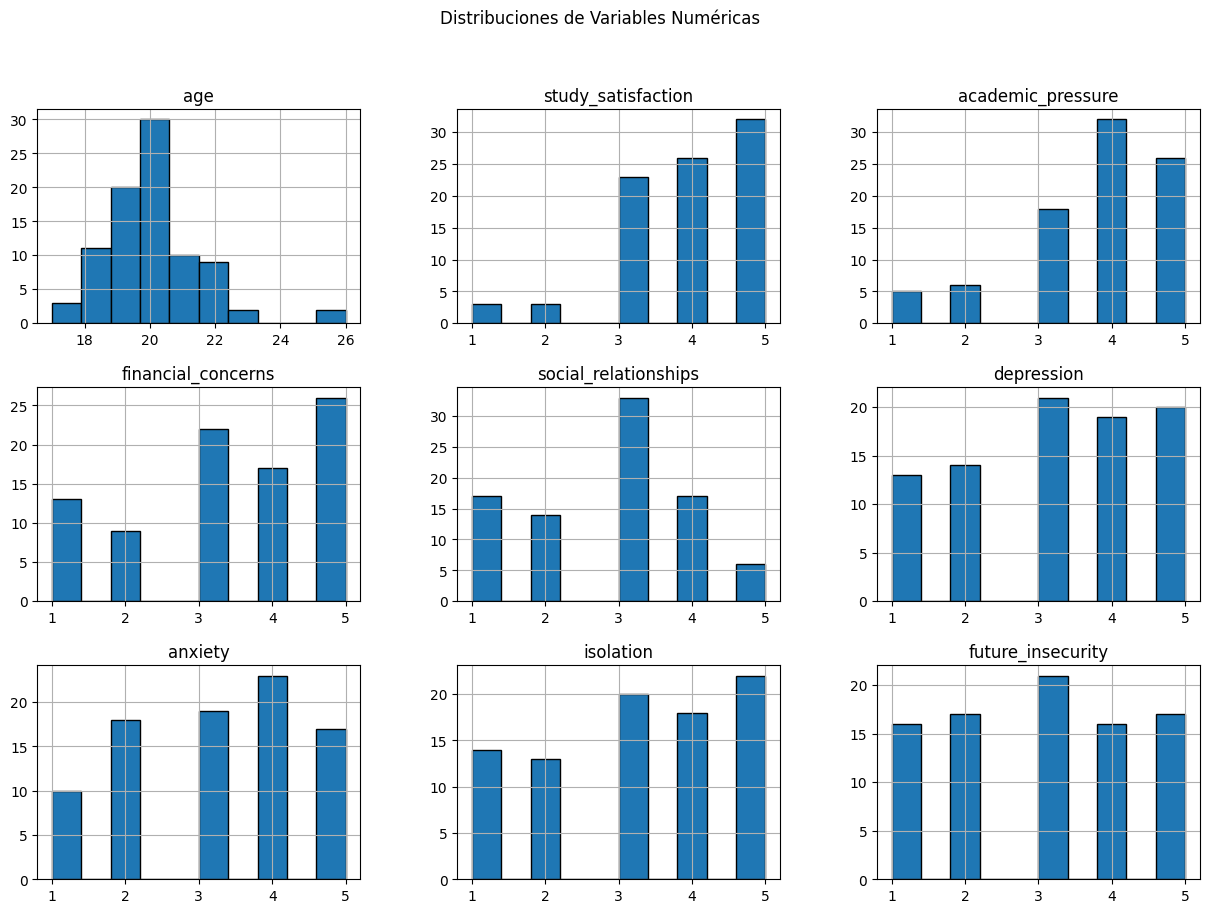

In [ ]:
# Histograma de las principales variables numericas
df_2[['age', 'study_satisfaction', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']].hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()

In [ ]:
# analisis de frecuencias de variables categoricas
categorical_cols = df_2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nFrecuencia de categorías en '{col}':")
    print(df_2[col].value_counts())


Frecuencia de categorías en 'gender':
gender
Male      63
Female    24
Name: count, dtype: int64

Frecuencia de categorías en 'university':
university
PU         56
UET        10
COMSATS     9
FAST        6
UMT         2
NUST        1
VU          1
UOL         1
KUST        1
Name: count, dtype: int64

Frecuencia de categorías en 'degree_level':
degree_level
Undergraduate    85
Postgraduate      2
Name: count, dtype: int64

Frecuencia de categorías en 'degree_major':
degree_major
Data Science              41
Computer Science          34
Information Technology     9
Software Engineering       3
Name: count, dtype: int64

Frecuencia de categorías en 'academic_year':
academic_year
1st year    34
3rd year    28
2nd year    15
4th year    10
Name: count, dtype: int64

Frecuencia de categorías en 'cgpa':
cgpa
3.0-3.5    27
3.5-4.0    27
2.5-3.0    22
0.0-0.0     5
2.0-2.5     4
1.5-2.0     2
Name: count, dtype: int64

Frecuencia de categorías en 'residential_status':
residential_status
Off-

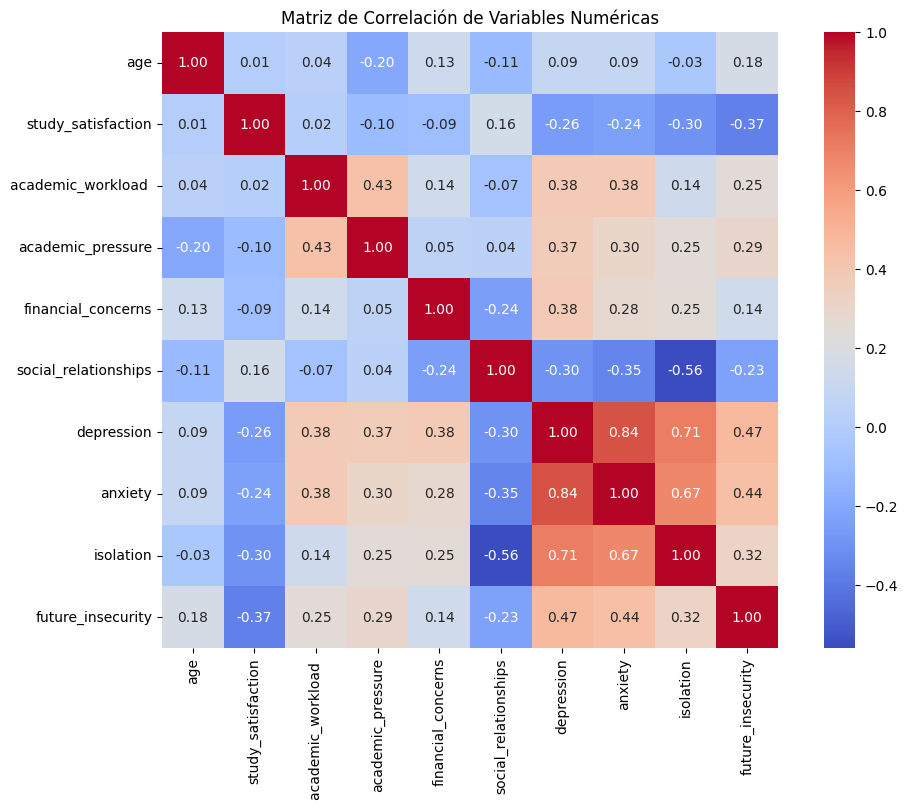

In [ ]:
# Matriz de correlacion y mapa de calor
numerical_df = df_2.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

### Limpieza de datos

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#### Limpieza General Dataset # 1

In [7]:
# Valores Faltantes
print("Valores Faltantes por columna:")
print(df_1.isnull().sum())

Valores Faltantes por columna:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
# Eliminar filas duplicadas
df_clean_1 = df_1.drop_duplicates()

In [9]:

# Codificar cada columna categórica con etiquetas numéricas
label_encoder = LabelEncoder()
categorical_cols = df_1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_1[col] = label_encoder.fit_transform(df_1[col])


In [10]:

scaler = StandardScaler()
numerical_cols = df_clean_1.select_dtypes(include=['int64', 'float64']).columns
df_clean_1[numerical_cols] = scaler.fit_transform(df_clean_1[numerical_cols])

In [11]:
# Detectar y eliminar outliers usando el método del IQR
Q1 = df_1[numerical_cols].quantile(0.25)
Q3 = df_1[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Mantener solo valores dentro del rango intercuartílico
df_clean_1 = df_1[~((df_1[numerical_cols] < (Q1 - 1.5 * IQR)) |(df_1[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
# Revisión final del DataFrame
print("Información final del DataFrame:")
print(df_clean_1.info())

# Revisión estadística
print("Resumen estadístico:")
display(df_clean_1.describe().transpose())


Información final del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      232 non-null    int64
 1   sex         232 non-null    int64
 2   age         232 non-null    int64
 3   address     232 non-null    int64
 4   famsize     232 non-null    int64
 5   Pstatus     232 non-null    int64
 6   Medu        232 non-null    int64
 7   Fedu        232 non-null    int64
 8   Mjob        232 non-null    int64
 9   Fjob        232 non-null    int64
 10  reason      232 non-null    int64
 11  guardian    232 non-null    int64
 12  traveltime  232 non-null    int64
 13  studytime   232 non-null    int64
 14  failures    232 non-null    int64
 15  schoolsup   232 non-null    int64
 16  famsup      232 non-null    int64
 17  paid        232 non-null    int64
 18  activities  232 non-null    int64
 19  nursery     232 non-null    int64
 20  high

,count,mean,std,min,25%,50%,75%,max
school,232.0,0.112069,0.316133,0.0,0.00,0.0,0.0,1.0
sex,232.0,0.469828,0.500168,0.0,0.00,0.0,1.0,1.0
age,232.0,16.478448,1.112488,15.0,16.00,16.0,17.0,20.0
address,232.0,0.810345,0.392876,0.0,1.00,1.0,1.0,1.0
famsize,232.0,0.271552,0.445722,0.0,0.00,0.0,1.0,1.0
Pstatus,232.0,0.905172,0.293610,0.0,1.00,1.0,1.0,1.0
Medu,232.0,2.862069,1.088281,0.0,2.00,3.0,4.0,4.0
Fedu,232.0,2.693966,1.055334,1.0,2.00,3.0,4.0,4.0
Mjob,232.0,2.241379,1.269834,0.0,2.00,2.0,3.0,4.0
Fjob,232.0,2.258621,0.859081,0.0,2.00,2.0,3.0,4.0


In [13]:
# Comparacion con el original
print("Comparación con el DataFrame original:")

print("Original")
display(df_1.describe().transpose())


print("Limpieza")
display(df_clean_1.describe().transpose())

Comparación con el DataFrame original:
Original


,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395.0,2.169620,1.227473,0.0,2.0,2.0,3.0,4.0
Fjob,395.0,2.281013,0.863542,0.0,2.0,2.0,3.0,4.0


Limpieza


,count,mean,std,min,25%,50%,75%,max
school,232.0,0.112069,0.316133,0.0,0.00,0.0,0.0,1.0
sex,232.0,0.469828,0.500168,0.0,0.00,0.0,1.0,1.0
age,232.0,16.478448,1.112488,15.0,16.00,16.0,17.0,20.0
address,232.0,0.810345,0.392876,0.0,1.00,1.0,1.0,1.0
famsize,232.0,0.271552,0.445722,0.0,0.00,0.0,1.0,1.0
Pstatus,232.0,0.905172,0.293610,0.0,1.00,1.0,1.0,1.0
Medu,232.0,2.862069,1.088281,0.0,2.00,3.0,4.0,4.0
Fedu,232.0,2.693966,1.055334,1.0,2.00,3.0,4.0,4.0
Mjob,232.0,2.241379,1.269834,0.0,2.00,2.0,3.0,4.0
Fjob,232.0,2.258621,0.859081,0.0,2.00,2.0,3.0,4.0


#### Limpieza General Dataset # 2

In [14]:
# Valores Faltantes
print("Valores Faltantes por columna:")
print(df_2.isnull().sum())

Valores Faltantes por columna:
gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64


In [15]:
df_clean_2 = df_2.dropna()

In [16]:
# Eliminar filas duplicadas
df_clean_2 = df_2.drop_duplicates()


In [17]:

# Codificar cada columna categórica con etiquetas numéricas
label_encoder = LabelEncoder()
categorical_cols = df_2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_2[col] = label_encoder.fit_transform(df_2[col])

In [18]:
scaler = StandardScaler()
numerical_cols = df_clean_2.select_dtypes(include=['int64', 'float64']).columns
df_clean_2[numerical_cols] = scaler.fit_transform(df_clean_2[numerical_cols])

In [19]:
# Detectar y eliminar outliers usando el método del IQR
Q1 = df_2[numerical_cols].quantile(0.25)
Q3 = df_2[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Mantener solo valores dentro del rango intercuartílico
df_clean_2 = df_2[~((df_2[numerical_cols] < (Q1 - 1.5 * IQR)) |(df_2[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
# Revisión final del DataFrame
print("Información final del DataFrame:")
print(df_clean_2.info())

# Revisión estadística
print("Resumen estadístico:")
display(df_clean_2.describe().transpose())


Información final del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    85 non-null     int64
 1   age                       85 non-null     int64
 2   university                85 non-null     int64
 3   degree_level              85 non-null     int64
 4   degree_major              85 non-null     int64
 5   academic_year             85 non-null     int64
 6   cgpa                      85 non-null     int64
 7   residential_status        85 non-null     int64
 8   campus_discrimination     85 non-null     int64
 9   sports_engagement         85 non-null     int64
 10  average_sleep             85 non-null     int64
 11  study_satisfaction        85 non-null     int64
 12  academic_workload         85 non-null     int64
 13  academic_pressure         85 non-null     int64
 14  financial_concer

,count,mean,std,min,25%,50%,75%,max
gender,85.0,0.717647,0.452816,0.0,0.0,1.0,1.0,1.0
age,85.0,19.800000,1.343414,17.0,19.0,20.0,20.0,23.0
university,85.0,3.600000,1.648953,0.0,4.0,4.0,4.0,8.0
degree_level,85.0,0.988235,0.108465,0.0,1.0,1.0,1.0,1.0
degree_major,85.0,0.776471,0.777304,0.0,0.0,1.0,1.0,3.0
academic_year,85.0,1.152941,1.063528,0.0,0.0,1.0,2.0,3.0
cgpa,85.0,3.658824,1.341223,0.0,3.0,4.0,5.0,5.0
residential_status,85.0,0.247059,0.433861,0.0,0.0,0.0,0.0,1.0
campus_discrimination,85.0,0.235294,0.426700,0.0,0.0,0.0,0.0,1.0
sports_engagement,85.0,1.847059,1.286430,0.0,0.0,2.0,3.0,3.0


In [21]:
# Comparacion con el original
print("Comparación con el DataFrame original:")

print("Original")
display(df_2.describe().transpose())


print("Limpieza")
display(df_clean_2.describe().transpose())

Comparación con el DataFrame original:
Original


,count,mean,std,min,25%,50%,75%,max
gender,87.0,0.724138,0.449539,0.0,0.0,1.0,1.0,1.0
age,87.0,19.942529,1.623636,17.0,19.0,20.0,21.0,26.0
university,87.0,3.586207,1.639283,0.0,4.0,4.0,4.0,8.0
degree_level,87.0,0.977011,0.150736,0.0,1.0,1.0,1.0,1.0
degree_major,87.0,0.781609,0.768951,0.0,0.0,1.0,1.0,3.0
academic_year,87.0,1.160920,1.076963,0.0,0.0,1.0,2.0,3.0
cgpa,87.0,3.666667,1.335270,0.0,3.0,4.0,5.0,5.0
residential_status,87.0,0.252874,0.437179,0.0,0.0,0.0,0.5,1.0
campus_discrimination,87.0,0.252874,0.437179,0.0,0.0,0.0,0.5,1.0
sports_engagement,87.0,1.804598,1.301511,0.0,0.0,2.0,3.0,3.0


Limpieza


,count,mean,std,min,25%,50%,75%,max
gender,85.0,0.717647,0.452816,0.0,0.0,1.0,1.0,1.0
age,85.0,19.800000,1.343414,17.0,19.0,20.0,20.0,23.0
university,85.0,3.600000,1.648953,0.0,4.0,4.0,4.0,8.0
degree_level,85.0,0.988235,0.108465,0.0,1.0,1.0,1.0,1.0
degree_major,85.0,0.776471,0.777304,0.0,0.0,1.0,1.0,3.0
academic_year,85.0,1.152941,1.063528,0.0,0.0,1.0,2.0,3.0
cgpa,85.0,3.658824,1.341223,0.0,3.0,4.0,5.0,5.0
residential_status,85.0,0.247059,0.433861,0.0,0.0,0.0,0.0,1.0
campus_discrimination,85.0,0.235294,0.426700,0.0,0.0,0.0,0.0,1.0
sports_engagement,85.0,1.847059,1.286430,0.0,0.0,2.0,3.0,3.0


### Creacion de conjunto de datos final

#### Union de los conjuntos de datos

In [22]:
df_clean_2 = df_clean_2.rename(columns={'gender': 'sex'})

In [23]:
df_merged = pd.merge(df_clean_1, df_clean_2, on=['age', 'sex'], how='inner')

In [24]:
print(df_merged.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'university',
       'degree_level', 'degree_major', 'academic_year', 'cgpa',
       'residential_status', 'campus_discrimination', 'sports_engagement',
       'average_sleep', 'study_satisfaction', 'academic_workload ',
       'academic_pressure', 'financial_concerns', 'social_relationships',
       'depression', 'anxiety', 'isolation', 'future_insecurity',
       'stress_relief_activities'],
      dtype='object')


In [25]:
df_merged.to_csv('df_merged.csv', index=False)


#### Inspeccion General para DataSet Final

In [27]:
df = df_merged

In [28]:
# primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Dimensiones del dataset
print("\nDimensiones del dataset:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Primeras filas del dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,0,0,18,1,0,0,4,4,0,4,...,1,4,5,5,2,5,5,5,5,0
1,0,0,17,1,0,1,1,1,0,2,...,4,5,5,5,1,5,5,5,3,29
2,0,0,17,1,0,1,1,1,0,2,...,4,4,4,5,3,4,4,5,2,8
3,0,0,17,1,1,1,2,2,2,2,...,4,5,5,5,1,5,5,5,3,29
4,0,0,17,1,1,1,2,2,2,2,...,4,4,4,5,3,4,4,5,2,8



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   school                    390 non-null    int64
 1   sex                       390 non-null    int64
 2   age                       390 non-null    int64
 3   address                   390 non-null    int64
 4   famsize                   390 non-null    int64
 5   Pstatus                   390 non-null    int64
 6   Medu                      390 non-null    int64
 7   Fedu                      390 non-null    int64
 8   Mjob                      390 non-null    int64
 9   Fjob                      390 non-null    int64
 10  reason                    390 non-null    int64
 11  guardian                  390 non-null    int64
 12  traveltime                390 non-null    int64
 13  studytime                 390 non-null    int64
 14  failures

In [29]:
# Estadísticas descriptivas de las variables numericas
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
school,390.0,0.258974,0.438634,0.0,0.00,0.0,1.0,1.0
sex,390.0,0.692308,0.462131,0.0,0.00,1.0,1.0,1.0
age,390.0,17.928205,0.762201,17.0,17.00,18.0,18.0,20.0
address,390.0,0.705128,0.456571,0.0,0.00,1.0,1.0,1.0
famsize,390.0,0.343590,0.475516,0.0,0.00,0.0,1.0,1.0
Pstatus,390.0,0.841026,0.366122,0.0,1.00,1.0,1.0,1.0
Medu,390.0,2.843590,1.091518,0.0,2.00,3.0,4.0,4.0
Fedu,390.0,2.494872,1.079715,1.0,2.00,2.0,3.0,4.0
Mjob,390.0,2.366667,1.338155,0.0,2.00,2.0,3.0,4.0
Fjob,390.0,2.258974,0.858712,0.0,2.00,2.0,3.0,4.0


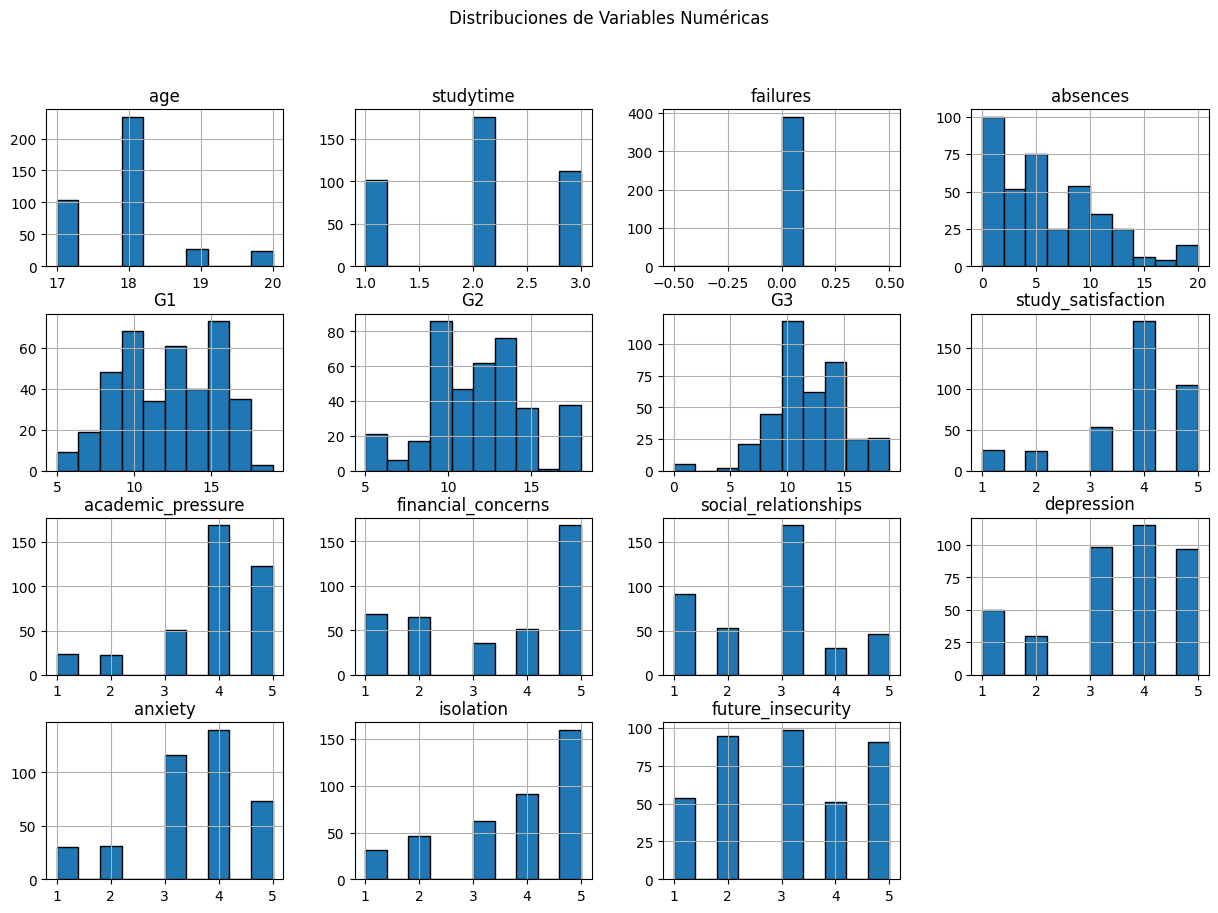

In [30]:
# Histograma de las principales variables numericas
df[['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3', 'study_satisfaction', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']].hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()

#### Limpieza General Dataset Final

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   school                    390 non-null    int64
 1   sex                       390 non-null    int64
 2   age                       390 non-null    int64
 3   address                   390 non-null    int64
 4   famsize                   390 non-null    int64
 5   Pstatus                   390 non-null    int64
 6   Medu                      390 non-null    int64
 7   Fedu                      390 non-null    int64
 8   Mjob                      390 non-null    int64
 9   Fjob                      390 non-null    int64
 10  reason                    390 non-null    int64
 11  guardian                  390 non-null    int64
 12  traveltime                390 non-null    int64
 13  studytime                 390 non-null    int64
 14  failures                  390 non-null    

In [32]:

columns_to_drop = [
    'school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
    'reason', 'guardian', 'traveltime', 'failures', 'schoolsup', 'famsup',
    'paid', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
    'goout', 'Dalc', 'Walc', 'absences', 'university', 'degree_level', 'degree_major',
    'academic_year', 'residential_status', 'campus_discrimination', 'sports_engagement',
    'average_sleep', 'study_satisfaction', 'academic_pressure',
    'financial_concerns', 'social_relationships', 'future_insecurity', 'stress_relief_activities'
]

df_clean = df.drop(columns=columns_to_drop)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sex                 390 non-null    int64
 1   age                 390 non-null    int64
 2   studytime           390 non-null    int64
 3   activities          390 non-null    int64
 4   health              390 non-null    int64
 5   G1                  390 non-null    int64
 6   G2                  390 non-null    int64
 7   G3                  390 non-null    int64
 8   cgpa                390 non-null    int64
 9   academic_workload   390 non-null    int64
 10  depression          390 non-null    int64
 11  anxiety             390 non-null    int64
 12  isolation           390 non-null    int64
dtypes: int64(13)
memory usage: 39.7 KB


In [38]:
df_psylearn = df_clean

In [41]:
# Transformacion para una mejor correlacion

# Inversion de escala
max_grade = df_psylearn[['G1', 'G2', 'G3', 'cgpa']].max().max()
df_psylearn['G1_invert'] = max_grade - df_psylearn['G1']
df_psylearn['G2_invert'] = max_grade - df_psylearn['G2']
df_psylearn['G3_invert'] = max_grade - df_psylearn['G3']
df_psylearn['cgpa_invert'] = max_grade - df_psylearn['cgpa']

In [43]:
# Normalizacion por grupo
df_psylearn['depression_z'] = df_psylearn.groupby('sex')['depression'].transform(lambda x: (x - x.mean()) / x.std())
df_psylearn['anxiety_z'] = df_psylearn.groupby('sex')['anxiety'].transform(lambda x: (x - x.mean()) / x.std())
df_psylearn['isolation_z'] = df_psylearn.groupby('sex')['isolation'].transform(lambda x: (x - x.mean()) / x.std())

In [45]:
# Transformacion logaritmica
df_psylearn['log_depression'] = np.log1p(df_psylearn['depression'])
df_psylearn['log_anxiety'] = np.log1p(df_psylearn['anxiety'])
df_psylearn['log_isolation'] = np.log1p(df_psylearn['isolation'])

In [47]:
# Carga emocional
df_psylearn['emotional_load'] = 0.4 * df_psylearn['depression'] + 0.3 * df_psylearn['anxiety'] + 0.3 * df_psylearn['isolation']

In [48]:
df_psylearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 390 non-null    int64  
 1   age                 390 non-null    int64  
 2   studytime           390 non-null    int64  
 3   activities          390 non-null    int64  
 4   health              390 non-null    int64  
 5   G1                  390 non-null    int64  
 6   G2                  390 non-null    int64  
 7   G3                  390 non-null    int64  
 8   cgpa                390 non-null    int64  
 9   academic_workload   390 non-null    int64  
 10  depression          390 non-null    int64  
 11  anxiety             390 non-null    int64  
 12  isolation           390 non-null    int64  
 13  G1_invert           390 non-null    int64  
 14  G2_invert           390 non-null    int64  
 15  G3_invert           390 non-null    int64  
 16  cgpa_inv

In [ ]:
df_clean.to_csv('psy_learn.csv', index=False)

In [50]:
correlation_matrix = df_psylearn[['log_depression', 'log_anxiety', 'log_isolation', 'G1_invert', 'G2_invert', 'G3_invert', 'cgpa_invert']].corr()
print(correlation_matrix)


                log_depression  log_anxiety  log_isolation  G1_invert  \
log_depression        1.000000     0.815136       0.647007   0.126000   
log_anxiety           0.815136     1.000000       0.696715   0.122433   
log_isolation         0.647007     0.696715       1.000000   0.176143   
G1_invert             0.126000     0.122433       0.176143   1.000000   
G2_invert             0.110215     0.109366       0.160693   0.926416   
G3_invert             0.113743     0.115553       0.161702   0.916513   
cgpa_invert          -0.005692     0.094934      -0.146751  -0.037663   

                G2_invert  G3_invert  cgpa_invert  
log_depression   0.110215   0.113743    -0.005692  
log_anxiety      0.109366   0.115553     0.094934  
log_isolation    0.160693   0.161702    -0.146751  
G1_invert        0.926416   0.916513    -0.037663  
G2_invert        1.000000   0.928581    -0.012796  
G3_invert        0.928581   1.000000    -0.006345  
cgpa_invert     -0.012796  -0.006345     1.000000  

In [ ]:
!ls

df_merged.csv		student_data.csv		  StudentPerformanceFactors.csv
MentalHealthSurvey.csv	student-mental-health-survey.zip  student-performance-factors.zip
psy_learn.csv		student-performance-data.zip


## **Conclusiones de la Implementacion - Primera Parte**

---

**Resumen**  
En esta primera fase de la implementación, se trabajó con los conjuntos de datos extraídos de la fuente. Durante el proceso, se llevó a cabo una revisión exhaustiva de los datos, seguida de un análisis estadístico básico para obtener una visión general. Posteriormente, se realizó una limpieza preliminar de los datos, y luego se unieron ambos conjuntos para formar un dataset consolidado.

Tras la unión, se ejecutó una limpieza más profunda, con la selección de las columnas relevantes para el análisis enfocado en la relación entre la salud mental y el rendimiento estudiantil. Este análisis se desarrollará en la _Segunda Parte de la Implementación_.

---

**Columnas del Dataset Final**  
Las siguientes columnas fueron seleccionadas para el análisis:

1. **Factores relacionados con la salud mental:**
   - `health`: Estado general de salud del estudiante, que puede influir en su bienestar emocional y físico.
   - `depression`: Nivel de depresión reportado por el estudiante, un factor crítico en la salud mental.
   - `anxiety`: Grado de ansiedad experimentado por el estudiante, relacionado con su bienestar psicológico.
   - `isolation`: Sentimiento de aislamiento social, que puede afectar el estado emocional del estudiante.

2. **Rendimiento académico:**
   - `G1`: Calificación obtenida en el primer trimestre, indicador inicial del rendimiento académico.
   - `G2`: Calificación obtenida en el segundo trimestre, reflejo del progreso académico.
   - `G3`: Calificación final del tercer trimestre, importante para medir el rendimiento global.
   - `cgpa`: Promedio acumulado de calificaciones, que resume el rendimiento académico del estudiante a lo largo del tiempo.

3. **Factores relacionados con el estudio:**
   - `studytime`: Tiempo dedicado al estudio, un factor que puede influir en el rendimiento académico.
   - `academic_workload`: Carga académica, que puede ser una fuente de estrés y afectar tanto la salud mental como el rendimiento.

4. **Factores personales y sociales:**
   - `sex`: Género del estudiante, que puede tener implicaciones en la percepción de la salud mental y el rendimiento académico.
   - `age`: Edad del estudiante, un factor importante que puede influir en su experiencia académica y emocional.
   - `activities`: Participación en actividades extracurriculares, que puede contribuir al bienestar mental o generar estrés adicional.

---

**Próximos Pasos**  
En la _Segunda Parte de la Implementación_, se procederá con el análisis detallado de los datos, que incluirá:

- Análisis de correlación entre las variables relacionadas con la salud mental y el rendimiento académico.
- Identificación de patrones y factores de riesgo que pueden impactar el bienestar psicológico de los estudiantes.
- Desarrollo de modelos predictivos para explorar la relación entre la salud mental y el rendimiento académico.

Este análisis proporcionará una comprensión más profunda de cómo la salud mental influye en el rendimiento académico y ayudará a identificar posibles áreas de intervención para mejorar el bienestar de los estudiantes.


## Implementacion - Segunda parte  
---  
En la segunda parte de la implementacion trabajamos con el conjunto de datos final, realizando los analisis planteados y modelos predictivos.

### Lectura de conjunto de datos - Final

In [ ]:
# Data
df = pd.read_csv('psy_learn.csv')

In [ ]:
df.head()

,sex,age,studytime,activities,health,G1,G2,G3,cgpa,academic_workload,depression,anxiety,isolation
0,0,18,2,0,3,5,6,6,3,4,5,5,5
1,0,17,2,0,3,5,5,6,5,5,5,5,5
2,0,17,2,0,3,5,5,6,5,4,4,4,5
3,0,17,1,0,5,10,13,12,5,5,5,5,5
4,0,17,1,0,5,10,13,12,5,4,4,4,5


### Analisis estadistico conjunto de datos - Final

In [ ]:
# primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Dimensiones del dataset
print("\nDimensiones del dataset:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Primeras filas del dataset:


,sex,age,studytime,activities,health,G1,G2,G3,cgpa,academic_workload,depression,anxiety,isolation
0,0,18,2,0,3,5,6,6,3,4,5,5,5
1,0,17,2,0,3,5,5,6,5,5,5,5,5
2,0,17,2,0,3,5,5,6,5,4,4,4,5
3,0,17,1,0,5,10,13,12,5,5,5,5,5
4,0,17,1,0,5,10,13,12,5,4,4,4,5



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sex                 390 non-null    int64
 1   age                 390 non-null    int64
 2   studytime           390 non-null    int64
 3   activities          390 non-null    int64
 4   health              390 non-null    int64
 5   G1                  390 non-null    int64
 6   G2                  390 non-null    int64
 7   G3                  390 non-null    int64
 8   cgpa                390 non-null    int64
 9   academic_workload   390 non-null    int64
 10  depression          390 non-null    int64
 11  anxiety             390 non-null    int64
 12  isolation           390 non-null    int64
dtypes: int64(13)
memory usage: 39.7 KB

Dimensiones del dataset:
Filas: 390, Columnas: 13


In [ ]:
# Estadísticas descriptivas de las variables numericas
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
sex,390.0,0.692308,0.462131,0.0,0.0,1.0,1.0,1.0
age,390.0,17.928205,0.762201,17.0,17.0,18.0,18.0,20.0
studytime,390.0,2.025641,0.741262,1.0,1.0,2.0,3.0,3.0
activities,390.0,0.561538,0.496836,0.0,0.0,1.0,1.0,1.0
health,390.0,3.458974,1.383750,1.0,2.0,3.0,5.0,5.0
G1,390.0,12.151282,3.130444,5.0,10.0,12.0,15.0,19.0
G2,390.0,11.889744,3.033768,5.0,10.0,12.0,14.0,18.0
G3,390.0,11.938462,3.326501,0.0,10.0,12.0,14.0,19.0
cgpa,390.0,3.266667,2.021902,0.0,1.0,4.0,5.0,5.0
academic_workload,390.0,3.823077,0.879344,2.0,3.0,4.0,4.0,5.0


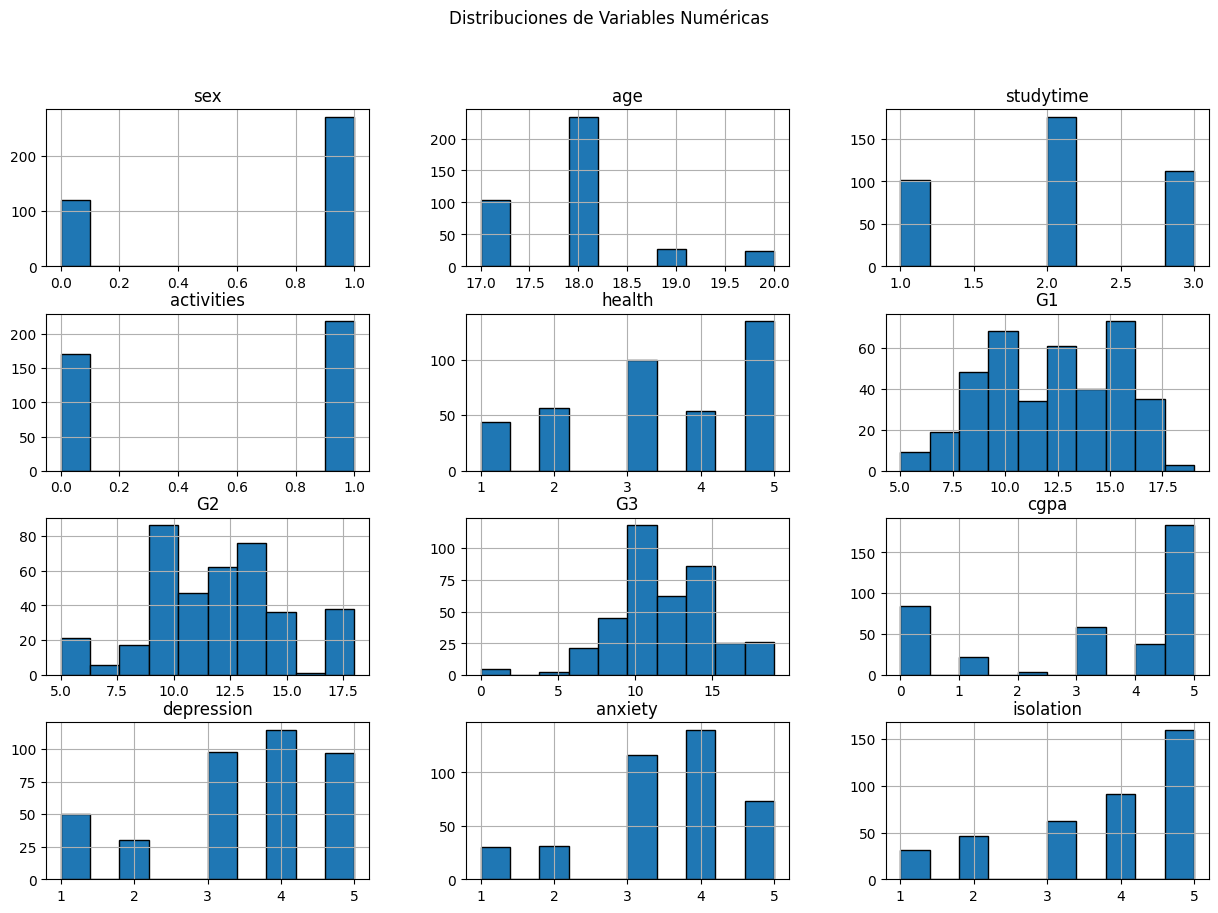

In [ ]:
# Histograma de las principales variables numericas
df[['sex', 'age', 'studytime', 'activities', 'health', 'G1', 'G2', 'G3', 'cgpa', 'depression', 'anxiety', 'isolation']].hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()

In [ ]:
estadisticas_generales = df.describe()

In [ ]:
df_masculino = df[df['sex'] == 1]
df_femenino = df[df['sex'] == 0]

In [ ]:
estadisticas_masculino = df_masculino.describe()
estadisticas_femenino = df_femenino.describe()

print("Estadísticas generales del dataset:")
print(estadisticas_generales)

print("\nEstadísticas para el grupo masculino:")
print(estadisticas_masculino)

print("\nEstadísticas para el grupo femenino:")
print(estadisticas_femenino)

Estadísticas generales del dataset:
              sex         age   studytime  activities      health          G1  \
count  390.000000  390.000000  390.000000  390.000000  390.000000  390.000000   
mean     0.692308   17.928205    2.025641    0.561538    3.458974   12.151282   
std      0.462131    0.762201    0.741262    0.496836    1.383750    3.130444   
min      0.000000   17.000000    1.000000    0.000000    1.000000    5.000000   
25%      0.000000   17.000000    1.000000    0.000000    2.000000   10.000000   
50%      1.000000   18.000000    2.000000    1.000000    3.000000   12.000000   
75%      1.000000   18.000000    3.000000    1.000000    5.000000   15.000000   
max      1.000000   20.000000    3.000000    1.000000    5.000000   19.000000   

               G2          G3        cgpa  academic_workload   depression  \
count  390.000000  390.000000  390.000000          390.000000  390.000000   
mean    11.889744   11.938462    3.266667            3.823077    3.458974   
std

In [ ]:
sns.set(style="whitegrid")

In [ ]:
variables_comparar = ['studytime', 'activities', 'health', 'G1', 'G2', 'G3', 'cgpa', 'depression', 'anxiety', 'isolation']
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

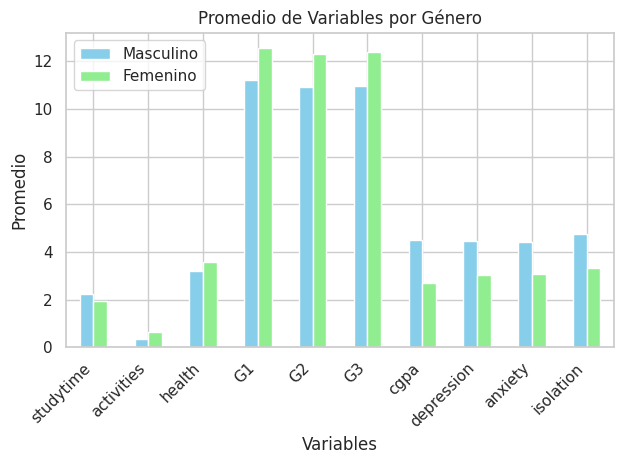

In [ ]:
mean_values = df.groupby('sex')[variables_comparar].mean().T

plt.figure(figsize=(12, 8))
mean_values.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Promedio de Variables por Género')
plt.xlabel('Variables')
plt.ylabel('Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(['Masculino', 'Femenino'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(df['sex'].value_counts())

sex
1    270
0    120
Name: count, dtype: int64


In [ ]:
min_count = df['sex'].value_counts().min()

In [ ]:
df_balanced = df.groupby('sex').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

print(df_balanced['sex'].value_counts())

sex
0    120
1    120
Name: count, dtype: int64


<ipython-input-186-e12184fbb7d0>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('sex').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


<Figure size 1200x800 with 0 Axes>

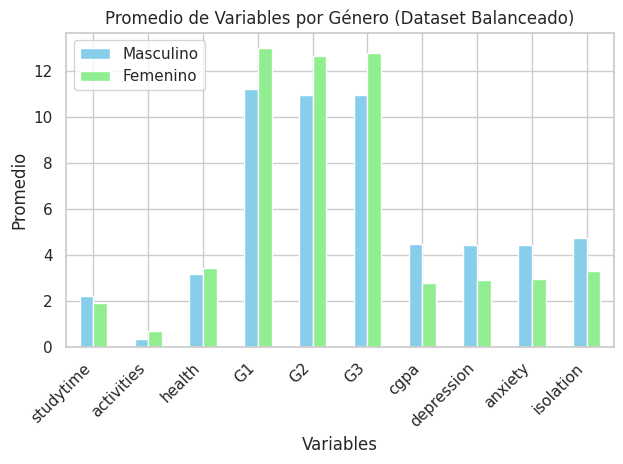

In [ ]:
mean_values_balanced = df_balanced.groupby('sex')[variables_comparar].mean().T

plt.figure(figsize=(12, 8))
mean_values_balanced.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Promedio de Variables por Género (Dataset Balanceado)')
plt.xlabel('Variables')
plt.ylabel('Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(['Masculino', 'Femenino'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(df.describe())

              sex         age   studytime  activities      health          G1  \
count  390.000000  390.000000  390.000000  390.000000  390.000000  390.000000   
mean     0.692308   17.928205    2.025641    0.561538    3.458974   12.151282   
std      0.462131    0.762201    0.741262    0.496836    1.383750    3.130444   
min      0.000000   17.000000    1.000000    0.000000    1.000000    5.000000   
25%      0.000000   17.000000    1.000000    0.000000    2.000000   10.000000   
50%      1.000000   18.000000    2.000000    1.000000    3.000000   12.000000   
75%      1.000000   18.000000    3.000000    1.000000    5.000000   15.000000   
max      1.000000   20.000000    3.000000    1.000000    5.000000   19.000000   

               G2          G3        cgpa  academic_workload   depression  \
count  390.000000  390.000000  390.000000          390.000000  390.000000   
mean    11.889744   11.938462    3.266667            3.823077    3.458974   
std      3.033768    3.326501    2.0219

### Analisis de relacion para la salud mental con el rendimiento estudiantil

In [ ]:
# Correlacion de las variables

mental_health_vars = ['depression', 'anxiety', 'isolation']
academic_vars = ['G1', 'G2', 'G3', 'cgpa']

df_health_academic = df[mental_health_vars + academic_vars]

correlation_matrix = df_health_academic.corr()
print(correlation_matrix)


            depression   anxiety  isolation        G1        G2        G3  \
depression    1.000000  0.806760   0.698795 -0.139086 -0.122676 -0.127844   
anxiety       0.806760  1.000000   0.773144 -0.140030 -0.123254 -0.131431   
isolation     0.698795  0.773144   1.000000 -0.181958 -0.164276 -0.166221   
G1           -0.139086 -0.140030  -0.181958  1.000000  0.926416  0.916513   
G2           -0.122676 -0.123254  -0.164276  0.926416  1.000000  0.928581   
G3           -0.127844 -0.131431  -0.166221  0.916513  0.928581  1.000000   
cgpa          0.088727 -0.031866   0.138217 -0.037663 -0.012796 -0.006345   

                cgpa  
depression  0.088727  
anxiety    -0.031866  
isolation   0.138217  
G1         -0.037663  
G2         -0.012796  
G3         -0.006345  
cgpa        1.000000  


<ipython-input-211-42b6963cff19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='depression', y='G1', data=df, palette='viridis')


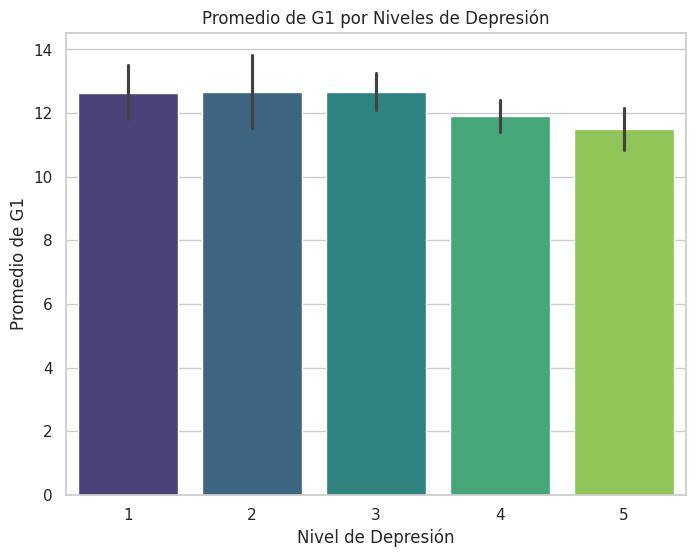

<ipython-input-211-42b6963cff19>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='anxiety', y='G2', data=df, palette='viridis')


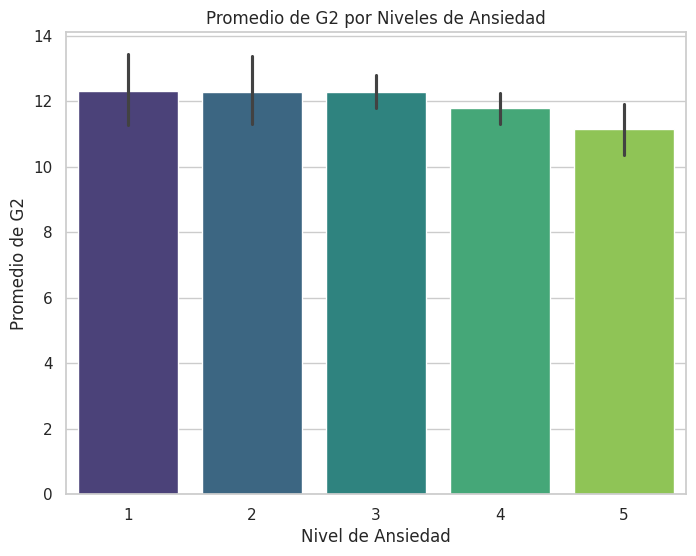

<ipython-input-211-42b6963cff19>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='isolation', y='G3', data=df, palette='viridis')


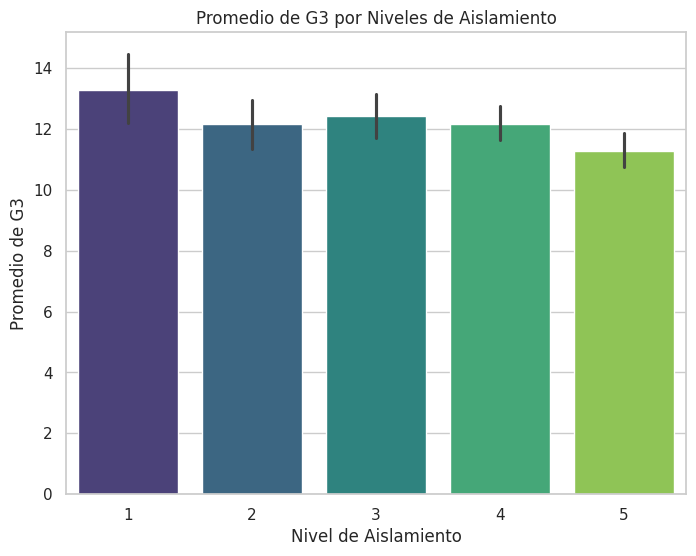

In [ ]:
# Graficos
plt.figure(figsize=(8, 6))
sns.barplot(x='depression', y='G1', data=df, palette='viridis')
plt.title('Promedio de G1 por Niveles de Depresión')
plt.xlabel('Nivel de Depresión')
plt.ylabel('Promedio de G1')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='anxiety', y='G2', data=df, palette='viridis')
plt.title('Promedio de G2 por Niveles de Ansiedad')
plt.xlabel('Nivel de Ansiedad')
plt.ylabel('Promedio de G2')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='isolation', y='G3', data=df, palette='viridis')
plt.title('Promedio de G3 por Niveles de Aislamiento')
plt.xlabel('Nivel de Aislamiento')
plt.ylabel('Promedio de G3')
plt.show()


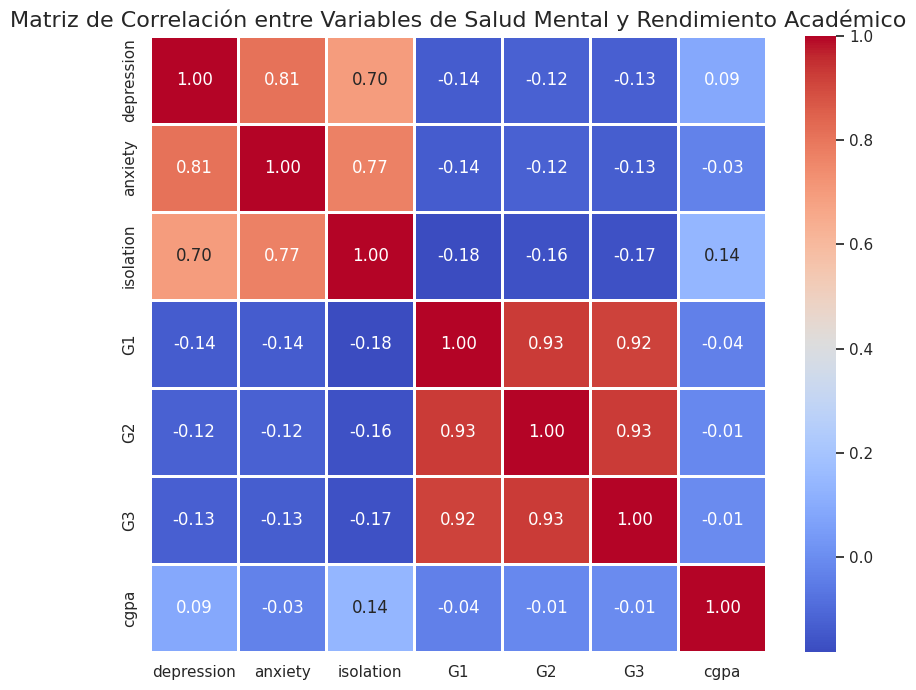

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)

plt.title("Matriz de Correlación entre Variables de Salud Mental y Rendimiento Académico", fontsize=16)

plt.show()

## **Conclusiones de la Implementacion - Segunda Parte (Matriz de correlacion)**  
---
Segun la matriz de correlacion tenemos que:  
1. **Correlacion entre las variables y la salud mental**  
  - depresion: tiene una correlación positiva significativa con anxiety (0.81) y isolation (0.70).  
  Esto nos dice que los estudiantes que reportan altos niveles de depresion tienden a presentar altos niveles de ansiedad y aislamiento.  

2. **Correlacion entre las variables de salud mental y rendimiento academico**  
  - La correlación entre depression y G1 es -0.14, con G2 es -0.12, y con G3 es -0.13. lo qque indica que en general no hay una fuerte relacion entre los niveles de depresion y las notas aunque hay una ligera tendencia a que los estudiantes con mas depresion tengan un rendimiento ligeramente peor.  

  - anxiety muestra correlaciones similares: -0.14 con G1, -0.12 con G2, y -0.13 con G3. Como con la depresion, la ansiedad parece tener una relacion no muy fuerte con el rendimiento academico.  
  
  - isolation tiene correlaciones algo mas fuertes con el rendimiento academicos: -0.18 con G1, -0.16 con G2, y -0.17 con G3. hay una tendencia mas marcada de que el aislamiento puede afectar negativamente el rendimiento académico.

---  

**Conclusion**  
Aunque no hay correlaciones muy fuertes entre las condiciones de salud mental y el rendimiento academico existe una ligera tendencia a que los estudiantes con mas depresion, ansiedad y aislamiento tengan un rendimiento académico inferior. Esto sugiere que la salud mental puede influir en el rendimiento, pero otros factores podrían estar interviniendo.


## **Implementacion - Tercera parte**  
---  


### Uso de modelos _(Regresion lineal)_

In [ ]:
# Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[mental_health_vars]
y = df['G1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R²: {r2}')
print(f'RMSE: {rmse}')

R²: -0.10576976494073964
RMSE: 3.112355052272805


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

X_train_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_scaled).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.061
Date:                Wed, 06 Nov 2024   Prob (F-statistic):            0.00749
Time:                        08:35:48   Log-Likelihood:                -795.63
No. Observations:                 312   AIC:                             1599.
Df Residuals:                     308   BIC:                             1614.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2436      0.177     69.330      0.0

In [ ]:

X_test_scaled = sm.add_constant(X_test_scaled)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')
print(f'RMSE: {rmse}')


R^2: -0.020187372833474715
RMSE: 2.9894875646277668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


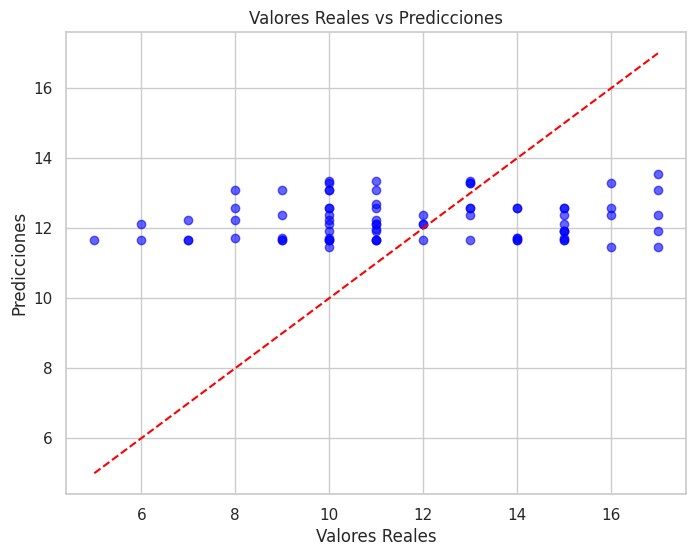

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()
